## 188 - Using get_layer to Simplify Vertical Subsetting

[Youtube](https://www.youtube.com/watch?v=Pu2d9XeXrpU)

In [1]:
import metpy.calc as mpcalc
from datetime import datetime
from metpy.units import units, pandas_dataframe_to_unit_arrays
from siphon.simplewebservice.wyoming import WyomingUpperAir
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
date = datetime(2021, 6, 27, 0)
station = 'FWD'

In [3]:
df = WyomingUpperAir.request_data(date, station)
df.head()

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,986.0,171,33.8,20.8,165.0,10.0,-2.588190,9.659258,FWD,72249,2021-06-27,32.83,-97.3,171.0,43.49
1,973.0,297,31.6,19.6,168.0,13.0,-2.702852,12.715919,FWD,72249,2021-06-27,32.83,-97.3,171.0,43.49
2,941.1,610,28.8,18.1,175.0,22.0,-1.917426,21.916283,FWD,72249,2021-06-27,32.83,-97.3,171.0,43.49
3,925.0,772,27.4,17.4,170.0,25.0,-4.341204,24.620194,FWD,72249,2021-06-27,32.83,-97.3,171.0,43.49
4,910.2,914,26.1,17.1,170.0,25.0,-4.341204,24.620194,FWD,72249,2021-06-27,32.83,-97.3,171.0,43.49


In [4]:
data = pandas_dataframe_to_unit_arrays(df)

In [5]:
df.units

{'pressure': 'hPa',
 'height': 'meter',
 'temperature': 'degC',
 'dewpoint': 'degC',
 'direction': 'degrees',
 'speed': 'knot',
 'u_wind': 'knot',
 'v_wind': 'knot',
 'station': None,
 'station_number': None,
 'time': None,
 'latitude': 'degrees',
 'longitude': 'degrees',
 'elevation': 'meter',
 'pw': 'millimeter'}

In [6]:
data

{'pressure': array([986. , 973. , 941.1, 925. , 910.2, 879.1, 871. , 850. , 819.2,
        790.6, 774. , 765. , 762.9, 755. , 744. , 735.8, 709.6, 700. ,
        697. , 688. , 683. , 676. , 661. , 659.6, 651. , 612.6, 609. ,
        584. , 568.1, 562. , 557. , 541. , 536. , 517. , 506.4, 500. ,
        489. , 487. , 469. , 468.2, 467. , 465. , 459. , 453. , 446. ,
        432.7, 423. , 415.8, 400. , 399.5, 368.1, 354. , 353.4, 324.9,
        305. , 300. , 298.6, 286. , 280. , 261. , 257. , 250.6, 250. ,
        249. , 239.5, 229. , 218.6, 200. , 199.2, 189.9, 189. , 178. ,
        167. , 158. , 156.2, 150. , 148. , 143. , 141.4, 134. , 128. ,
        127.8, 121.4, 115.3, 114. , 107. , 103. , 100. ,  93.9,  90.1,
         88.9,  85. ,  81. ,  76.4,  72.7,  71.1,  70. ,  69.1,  65.7,
         64.7,  59.8,  59.5,  56.6,  53.9,  52.4,  50. ,  48.8,  47.9,
         46.5,  44.7,  42.2,  41. ,  40.2,  37.8,  36.5,  33.3,  30. ,
         28.9,  28. ,  25.9,  23.9,  20.8,  20. ,  18.6,  18.1,  

In [7]:
p_subset, speed_subset, dir_subset = mpcalc.get_layer(data['pressure'], data['speed'], data['direction'])
p_subset

Magnitude,[986.0 973.0 941.1 925.0 910.2 886.0]
Units,hectopascal


In [8]:
data['pressure']

Magnitude,[986.0 973.0 941.1 925.0 910.2 879.1 871.0 850.0 819.2 790.6 774.0 765.0 762.9 755.0 744.0 735.8 709.6 700.0 697.0 688.0 683.0 676.0 661.0 659.6 651.0 612.6 609.0 584.0 568.1 562.0 557.0 541.0 536.0 517.0 506.4 500.0 489.0 487.0 469.0 468.2 467.0 465.0 459.0 453.0 446.0 432.7 423.0 415.8 400.0 399.5 368.1 354.0 353.4 324.9 305.0 300.0 298.6 286.0 280.0 261.0 257.0 250.6 250.0 249.0 239.5 229.0 218.6 200.0 199.2 189.9 189.0 178.0 167.0 158.0 156.2 150.0 148.0 143.0 141.4 134.0 128.0 127.8 121.4 115.3 114.0 107.0 103.0 100.0 93.9 90.1 88.9 85.0 81.0 76.4 72.7 71.1 70.0 69.1 65.7 64.7 59.8 59.5 56.6 53.9 52.4 50.0 48.8 47.9 46.5 44.7 42.2 41.0 40.2 37.8 36.5 33.3 30.0 28.9 28.0 25.9 23.9 20.8 20.0 18.6 18.1 17.3 17.3 16.5 16.1 14.8 14.0 13.8 12.1 12.0 11.5 11.0 11.0 10.0 10.0 9.6 9.3 9.2 8.8 8.4 8.3]
Units,hectopascal


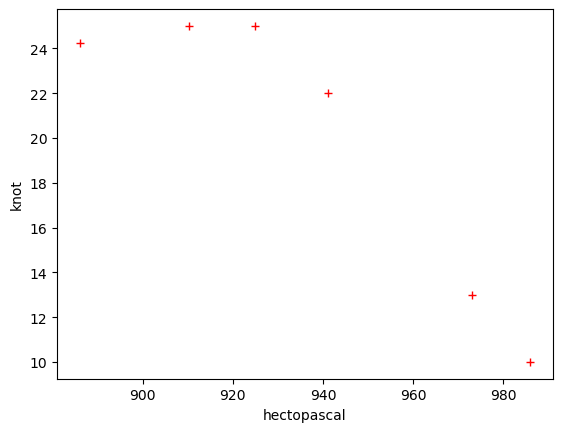

In [9]:
plt.plot(p_subset, speed_subset, 'r+')

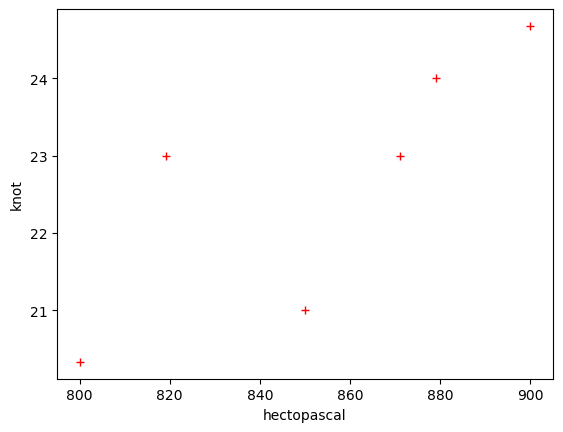

In [10]:
p_subset, speed_subset, dir_subset = mpcalc.get_layer(data['pressure'], data['speed'], data['direction'], bottom = 900 * units.hPa)

plt.plot(p_subset, speed_subset, 'r+')

In [11]:
p_subset

Magnitude,[900.0 879.1 871.0 850.0 819.2 800.0]
Units,hectopascal


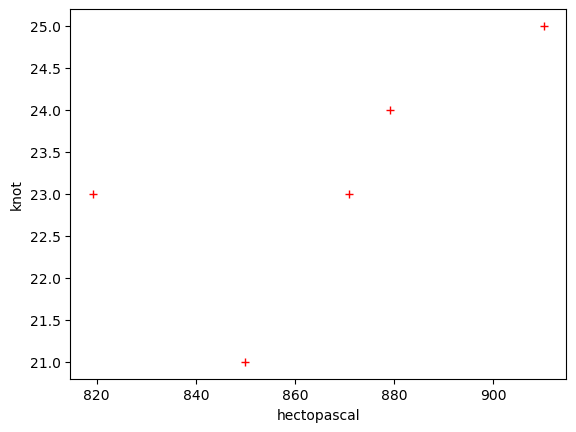

In [12]:
p_subset, speed_subset, dir_subset = mpcalc.get_layer(data['pressure'], data['speed'], data['direction'], bottom = 900 * units.hPa, interpolate = False)

plt.plot(p_subset, speed_subset, 'r+')

In [13]:
p_subset

Magnitude,[910.2 879.1 871.0 850.0 819.2]
Units,hectopascal


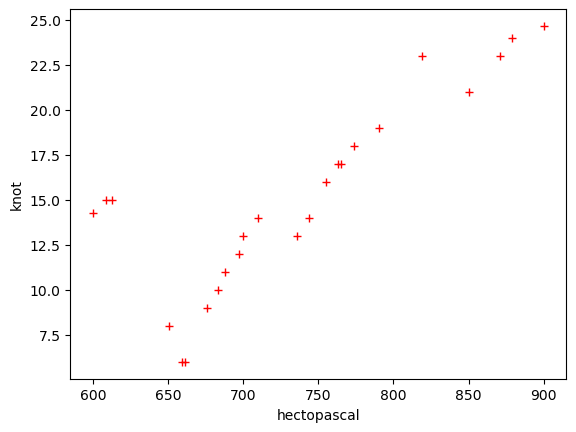

In [14]:
p_subset, speed_subset, dir_subset = mpcalc.get_layer(data['pressure'], data['speed'], data['direction'], bottom = 900 * units.hPa, depth = 300 * units.hPa)

plt.plot(p_subset, speed_subset, 'r+')

In [15]:
p_subset

Magnitude,[900.0 879.1 871.0 850.0 819.2 790.6 774.0 765.0 762.9 755.0 744.0 735.8 709.6 700.0 697.0 688.0 683.0 676.0 661.0 659.6 651.0 612.6 609.0 600.0]
Units,hectopascal


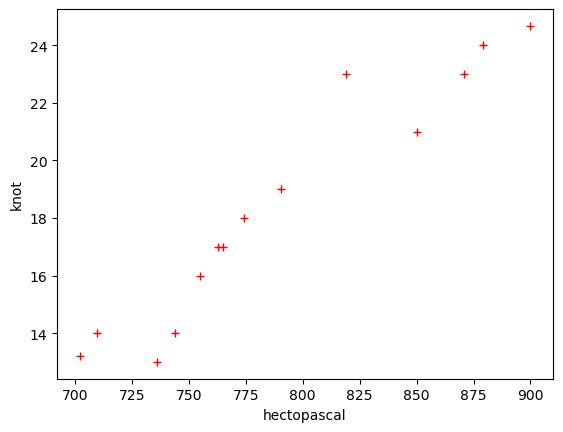

In [16]:
p_subset, speed_subset, dir_subset = mpcalc.get_layer(data['pressure'], data['speed'], data['direction'], bottom = 900 * units.hPa, depth = 2000 * units.m)

plt.plot(p_subset, speed_subset, 'r+')

In [17]:
p_subset

Magnitude,[900.0 879.1 871.0 850.0 819.2 790.6 774.0 765.0 762.9 755.0 744.0 735.8 709.6 702.0149737923042]
Units,hectopascal


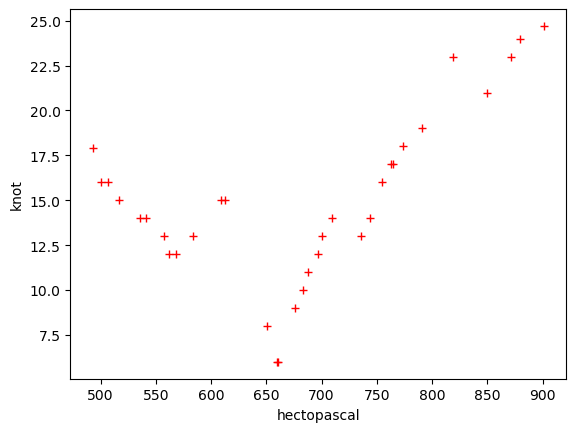

In [18]:
p_subset, speed_subset, dir_subset = mpcalc.get_layer(data['pressure'], data['speed'], data['direction'], bottom = 1000 * units.m, depth = 5000 * units.m, height = data['height'])

plt.plot(p_subset, speed_subset, 'r+')

In [19]:
p_subset

Magnitude,[901.0 879.1 871.0 850.0 819.2 790.6 774.0 765.0 762.9 755.0 744.0 735.8 709.6 700.0 697.0 688.0 683.0 676.0 661.0 659.6 651.0 612.6 609.0 584.0 568.1 562.0 557.0 541.0 536.0 517.0 506.4 500.0 493.0]
Units,hectopascal
